# Plotting your first graph: 

First let's make sure that this notebook works well in both python 2 and 3: 

In [1]:
from __future__ import division, print_function, unicode_literals

First, we need to import the matplotlib library. 

In [2]:
import matplotlib

Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc.  
When running python using command line, the graphs are typically shown in a seperte window. 

In Jupyter notebook, we can simply output the graphs with the notebook iteself by running the `%matplotlib inline` magic command.  

In [3]:
%matplotlib inline
# matplotlib.use(Tkagg)# Use this in your program if you
# want to use Tk as your graphics backend. 

Now, let's plot out first graph! 

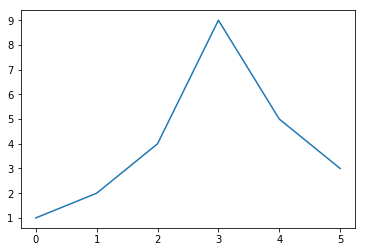

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,4,9,5,3])
plt.show()

Yes, it's as simple as calling the `plot` functions with some data and then calling the `show` function! 

If the plot function is given one array of data, it will use it as the coordinates of the certicals axis, and it will just use each data point's index in the array as the horizontal coordinate.  

You can alson provide two arrays: one for the horizontal axis `x`, and second for the vertical axis `y`.  

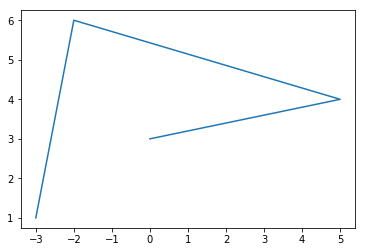

In [5]:
plt.plot([-3,-2,5,0],[1,6,4,3])
plt.show()

The axes automatically match the extend of the data.  
We would like to give the graph a bit more room, so let's call the axis function to change the extend of each axis [xmin, xmax, ymin, ymax].  

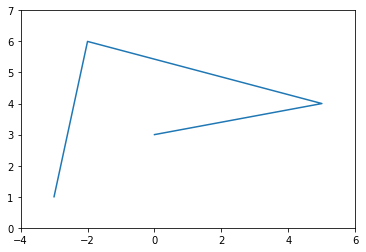

In [6]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.axis([-4, 6, 0,7])
# Using 1 less than the minimum value, 1 more than the 
# maximum value for each axis. 

plt.show()

Now, let's plot a mathematical function. We use NumPy's `linspace` function to create an array `x` conbtaining 500 floats ranging from -2 to 2.  
Then we create a second array y, computed as the square of x. 
This will plot a $ x^2 $ parabola :) 

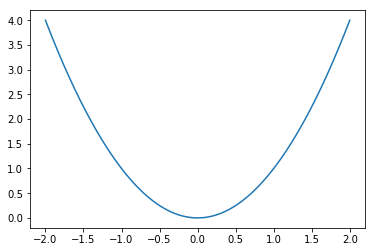

In [7]:
import numpy as np

x = np.linspace(-2,2,500)
# >> Array of 500 floats, between -2 and 2. 
y = x**2

plt.plot(x,y)
plt.show()

That's a bit dry, let's adda title, and x and y labels, and draw a grid. 

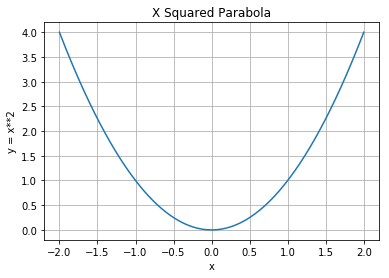

In [8]:
plt.plot(x,y)
plt.title("X Squared Parabola")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.grid(True)
plt.show()

# Line style and color 
By deafault, matplotlib draws a line between consecutive points. 


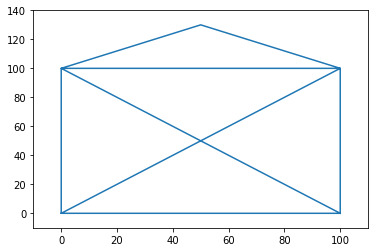

In [9]:
plt.plot([0,100, 100, 0, 0, 100, 50 , 0 ,100],
        [0, 0, 100, 100, 0, 100, 130, 100, 0])
plt.axis([-10, 110, -10, 140])
plt.show()
# So, as you notice here, starting from (0,0), matplotlib
# draws a line to the right: (100,0), then upwards to 
# (100,100), and goes on line this, like a turtle in 
# Python. 
# It's basically drawing a line plot here, just seems 
# like a drawing because of our selection of points. 

You can pass a 3rd argument to change the line's styple and color. 

For example, `"g--"` meands "green dashed line". 

<function matplotlib.pyplot.show>

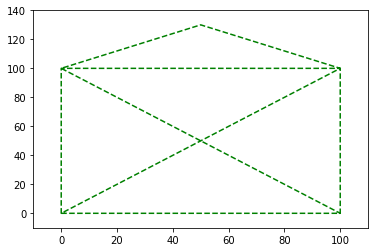

In [10]:
plt.plot([0,100, 100, 0, 0, 100, 50 , 0 ,100],
        [0, 0, 100, 100, 0, 100, 130, 100, 0],
        "g--")
plt.axis([-10,110, -10, 140])
plt.show

You can also plot multiple lines on one graph very simply, just pass `x1, y1, [style1], x2, y2, [style2]`  

For example:


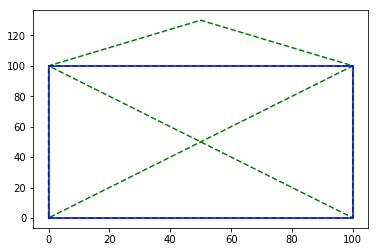

In [11]:
plt.plot([0,100, 100, 0, 0, 100, 50 , 0 ,100], # x1
        [0, 0, 100, 100, 0, 100, 130, 100, 0], # y1
        "g--", # [style1]
        [0, 100, 100, 0, 0],# x2 
         [0, 0, 100, 100, 0], # y2 ,
         "b-")

Or simply `plot` multiple times before calling show. 


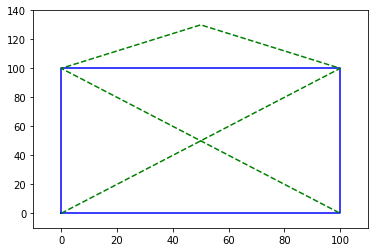

In [12]:
plt.plot([0,100, 100, 0, 0],
        [0, 0, 100, 100, 0], 
         "b-")
plt.plot([0,100, 50, 0, 100], 
          [0, 100, 130, 100, 0],
         "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

You can also draw some points instead of lines.   
Here's an example with green dashed, red dotted lines, and blue triangles. 

Check out [the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for the full list of style & color options.

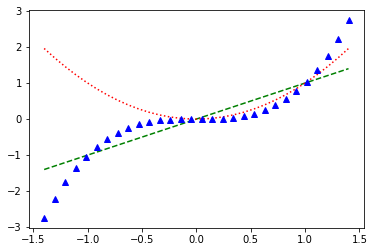

In [13]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x,x, "g--", # green dashed line, slope 1
        x, x**2, 'r:', # red dotted parabola 
        x, x**3, 'b^', # blue triangle cubic function 
        )

The plot function retruns a list of `Line2d` objescts, (one for each line).  
You can set extra attribiutes on these lines, such as the line width, the dash styple or the alpha level ( transparency level)  

 See the full list of attributes in [the documentation](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties).

<function matplotlib.pyplot.show>

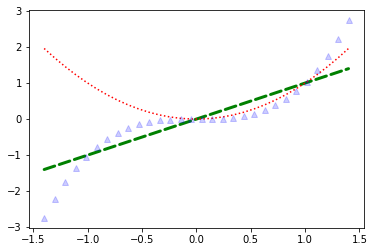

In [14]:
x = np.linspace(-1.4, 1.4, 30)
line1, line2 , line3 = plt.plot(x,x, "g--", # green dashed line, slope 1
        x, x**2, 'r:', # red dotted parabola 
        x, x**3, 'b^', # blue triangle cubic function 
        )
line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show

# Saving a figure: 


Saving a figure to disk is as simple as calling `savefig` with the name of the file (or a file object.  
The available image formats depend on the graphics backend you use. 



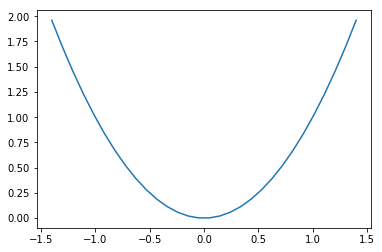

In [15]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.png")

# transparent: 
# If True, the axes patches will all be transparent; 
# the figure patch will also be transparent unless 
# facecolor and/or edgecolor are specified via kwargs.
# This is useful, for example, for displaying a plot 
# on top of a colored background on a web page. 
# The transparency of these patches will be restored 
# to their original values upon exit of this function.


# Subplots: 

A matplotlib figure may contain subplots.  

These subplots are organised in a grid. To create a subplot , just call the `subplot` function,and specify the number of rows and columns in the figure, and the index of the subplot, you want to draw on ( starting from 1, then left to right, and top to bottom).   

Note that pyplot keeps track of currently active subplot ( which you can get a reference to by calling `plt.gca())`, so when you call the `plot` function, it draws on the `active` subplot. 


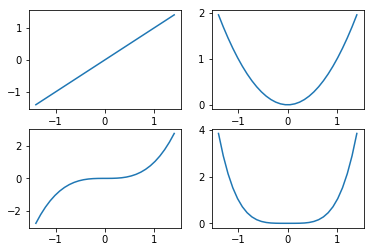

In [16]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2,2,1) # 2 rows, 2 columns, 1st subplot
plt.plot(x,x)
plt.subplot(2,2,2)# 2 rows, 2 columns, 2nd subplot
plt.plot(x, x**2) 

plt.subplot(2,2,3) # 2 rows, 2 columns, 3rd subplot
plt.plot(x,x**3)

plt.subplot(2,2,4) # 2 rows, 2 columns, 4th subplot 
plt.plot(x,x**4)


- Note that `subplot(223)` is a shorthand for `subplot(2, 2, 3). `

It's easy to create subplots that span across muyltiple grid cells like so: 


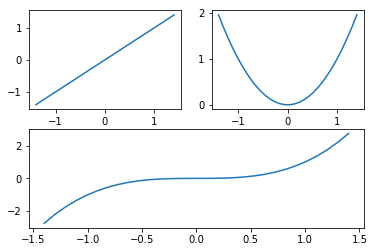

In [17]:
plt.subplot(2,2,1) # 2 rows, 2 columns, 1st subplot
plt.plot(x,x) # = top left

plt.subplot(2,2,2) # 2 rows, 2 columns, 2nd subplot
plt.plot(x,x**2) # = top right

plt.subplot(2,1,2) # 2 rows, *1* column, 2nd subplot 
plt.plot(x, x**3) # = bottom


If you need more complex subplot positioning, you can use `subplot2grid` instead of `subplot`.  

You can specify the number of rows and columns in the grid, then your subplot's position in that grid(top-left = (0,0)), and optionally how many rows and/or columns it spans. 

For example:
 

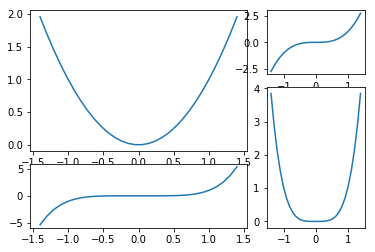

In [18]:
plt.subplot2grid((3,3), (0,0), rowspan = 2, colspan = 2)
plt.plot(x, x**2) # Top Left(0,0)

plt.subplot2grid((3,3), (0,2)) # Top Right(0,2),
# will automatically set the span
plt.plot(x, x**3)

plt.subplot2grid((3,3), (2,0), colspan = 2)
# rowspan, by default  = 1. 
plt.plot(x, x**5)

plt.subplot2grid((3,3), (1,2), rowspan = 2)
# colspan = 1, by default.
plt.plot(x, x**4) # = Bottom Right (1,2)

plt.show()

# Multiple Figures: 


It is also possible to draw multiple figures.  

Each figure may contain one or more subplots. 
By default, matplotlib creates `figure(1)` automatically.  

When you switch figure, pyplot keeps track of the currently active figure ( which you can get a reference to by calling `plt.gcf()`, and the active subplot of that figure becomes the current subplot. 


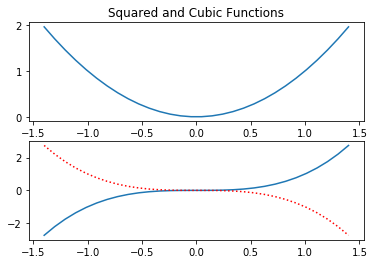

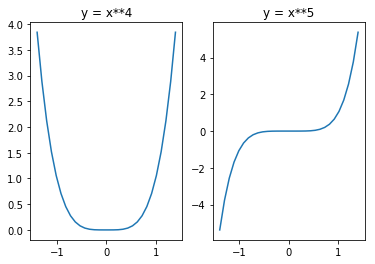

In [19]:
x = np.linspace(-1.4,1.4, 30)

#### ------ Figure 1 -------- ####
plt.figure(1)
plt.subplot(211) # 2 rows, 1 column, 1st subplot 
plt.plot(x,x**2)
plt.title("Squared and Cubic Functions")

plt.subplot(212) # 2 rows, 1 column, 2nd subplot
plt.plot(x, x**3)

#### ------ Figure 2 -------- ####
plt.figure(2)
plt.subplot(121) # 1 rows, 2 columns, 1st subplot
plt.plot(x, x**4)
plt.title("y = x**4")

plt.subplot(122) # 1 rows, 2 columns, 2nd subplot
plt.plot(x, x**5) 
plt.title("y = x**5")

plt.figure(1) 
# Switching back to figure 1, current subplot is 212 
# (bottom)
plt.plot(x, -x**3, "r:")
# Adding a red dotted negative cubic function on the 
# cubic function subplot, or the 212 subplot, figure 1. 

# Pyplot's state machine: Implicit vs Explicit: 

So far, we have use Pyplot's state machine which keeps track of the currently active subplot.  
Every time you call the `plot` function, pyplot justs draws on the currentlt active subplot. 
Its also does some more magic, sucha sa automatically creating a figure and a subplot when call `plot`, if they don't exist. 
This magic is convenient in an interactive environment(such as Juypyter).  

But when you are writing a program, `explicit is better than implicit`.  
Explicit code us usally easier to debug and maintain, and if you don't believe me just read the 2nd rule in the Zen of Python. 


In [20]:
import this 

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Fortunately, Pyplot allows you to ignore the state machine entirely, so you can write beautifully explicit code. Simply call the `subplots` function and use the figure object and the list of axes objects that are returned. No more magic! For example: 



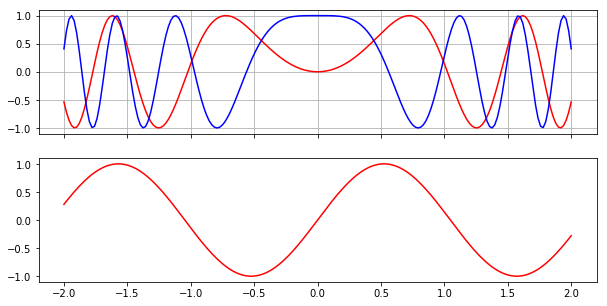

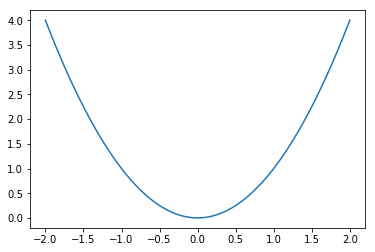

In [21]:
x = np.linspace(-2, 2 , 200)
# Creating an array of 200 floats between -2 and 2. 

fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex = True)
# Probably makes 2 subplots, shares the x axis among
# both of them. 
# Cause the arguments mention 2 rows and 1 column. 
# So i'm guessing it uses 1 row for each subplot. 

fig1.set_size_inches(10,5)
line1 , line2 = ax_top.plot(x, np.sin(3*x**2), "r-",
                           x, np.cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, np.sin(3*x), "r-")
ax_top.grid(True)

fig2, ax = plt.subplots(1,1) 
ax.plot(x, x**2)
plt.show()

DOUBT: __what is `sharex = True`? __ 
> - True or ‘all’: x- or y-axis will be shared among all subplots.
- False or ‘none’: each subplot x- or y-axis will be independent.
- ‘row’: each subplot row will share an x- or y-axis.
- ‘col’: each subplot column will share an x- or y-axis.
The above is an example of object oriented, explicit programming. We did nbot mention the name of the figures, or the name of the subplots in the previous examples. For instance, in code block 17, we just enter the subplots functions, and then directly use plt.plot(), cause behing the scenes, the active plot is the subplot we activated in the line before. 

But in this example, we have names the subplots as `as_top`, `ax_bottom`. 

For consistency, we will continue to use pyplot's state machine in the rest of the tutorial, but we recommnend using the object-oriented interface in your programs. 



# Pylab vs Pyplot vs Matplotlib  

There is some confusion around the relationship between pylab, pyplot and matplotlib.  It's simple. Matploplib is the full library, it contains everything including pyplot and pylab.  

Pyplot provides a number of tools to plot graphs, including the state-machine interface to the underlying object-oriented plotting library. 

Pylab is a convenience module that imports matplotlib.pyplot and Numpy in a single name space.  

You will find many examples using pylab, but it is no longer recommended. ( because `explicit is better than implicit`).  

# Drawing Text:   

You can call the `text` to add `text` at any location in the graph. 
Just specifythe horizontal and vertical coordinates, and the text, and optionally some extra attributes.  

Any text in matplotlib may contain TeX equation expressions, see [the documentation](http://matplotlib.org/users/mathtext.html) for more details.

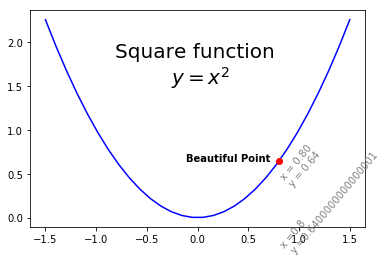

In [22]:
import numpy as np
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")
# Plots the parabola in blue, and a point (px, py) in
# red. 

plt.text(0, 1.5 ,"Square function \n $ y = x^2$",
        fontsize = 20, horizontalalignment = "center")
# Will print text at point: (0,1.5)

plt.text(px - 0.08, py, "Beautiful Point", 
        ha = "right", weight = 'heavy')
# Will print text at point (px - 0.08, py), with heavy 
# weight and horizontal rightward alignment. 

# DOUBT: What is the difference between line 19, and 21
plt.text(px, py, "x ={0}\n y ={1}".format(px,py), 
        rotation = 50, color='gray') 
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')


- Note: `ha` is an alis for `horiziontalalignment`. 

For more text properties, visit [the documentation](http://matplotlib.org/users/text_props.html#text-properties).

It is quite frequent to annotate elements of a graph, such as the beautiful point above. The `annotate` function makes this easy: just indicate the location of the point of interest, and the position of the text, plus optionally some extra attributes for the text and the arrow.

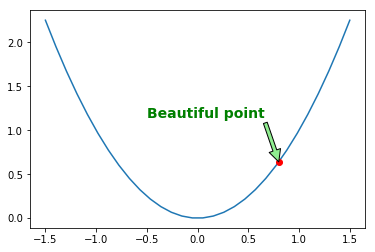

In [23]:
plt.plot(x, x**2, px, py, "ro")
plt.annotate("Beautiful point", 
             xy=(px, py), 
             xytext=(px-1.3,py+0.5),
            color="green", weight="heavy", fontsize=14,
            arrowprops={"facecolor": "lightgreen"})
plt.show()

__ You can also add a bounding box around your text by using the `bbox` attribute: __

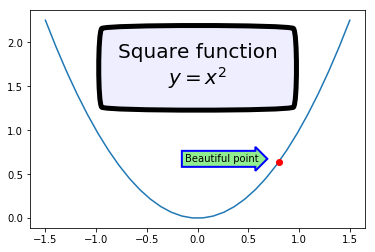

In [24]:
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(
    boxstyle = "rarrow, pad = 0.3", # shape, and size
    ec = "b", # color of outline of  arrow
    lw = 2, # outer width
    fc = "lightgreen") # inside color 


plt.text(px - 0.2, py, "Beautiful point",
        bbox = bbox_props, ha = "right")

bbox_props = dict(boxstyle = "round4, pad = 1, \
                rounding_size = 0.2",
                 ec = 'black',
                 lw = 5,
                 fc = "#EEEEFF")
plt.text(0,1.5 , "Square function\n$y = x^2$",
        fontsize = 20, color = "black", ha ="center",
        bbox = bbox_props)


Just for fun, if you want an [xkcd](http://xkcd.com)- style plot, just draw within `with plt.xkcd()` section: 

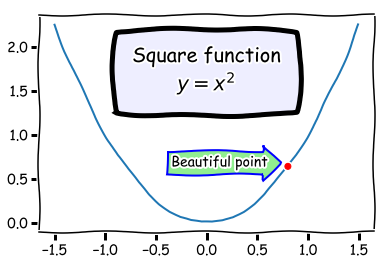

In [25]:
with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(
        boxstyle = "rarrow, pad = 0.3", # shape, and size
        ec = "b", # color of outline of  arrow
        lw = 2, # outer width
        fc = "lightgreen") # inside color 


    plt.text(px - 0.2, py, "Beautiful point",
            bbox = bbox_props, ha = "right")

    bbox_props = dict(boxstyle = "round4, pad = 1, \
                    rounding_size = 0.2",
                     ec = 'black',
                     lw = 5,
                     fc = "#EEEEFF")
    plt.text(0,1.5 , "Square function\n$y = x^2$",
            fontsize = 20, color = "black", ha ="center",
            bbox = bbox_props)

# Legends: 

The simplest way to add a legend is to set a label on all lines, then just call the `legend` function. 



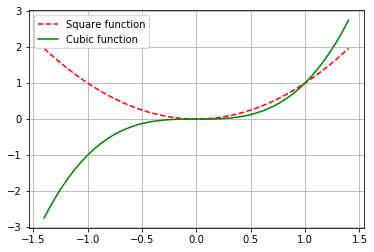

In [26]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label = "Square function")
plt.plot(x, x**3, "g-", label = "Cubic function")
plt.legend(loc = "best")
plt.grid(True)

# Non Linear Scales: 
Matplotlib suppports non linear scales, such as logarithmic or logit scales. 
What are [logits](https://en.wikipedia.org/wiki/Logit#Definition) ? 

The __logit__ of a number p between 0 and 1, is given by the formula: 

$ logit(p) = log \frac{p}{1 - p} = log(p) - log(1-p) = -log( \frac{1}{p} -1 ) $


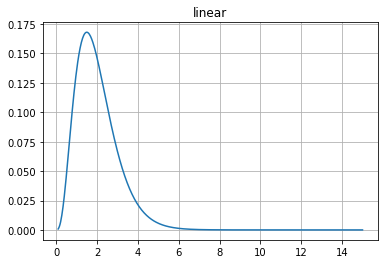

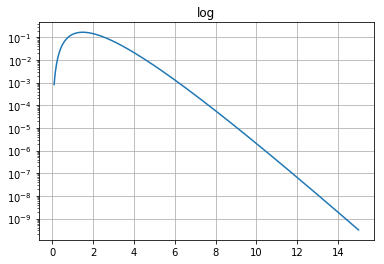

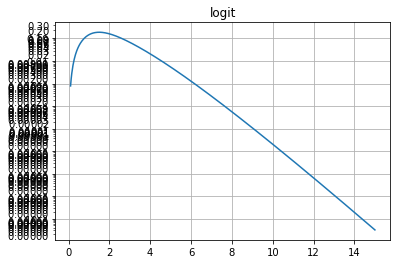

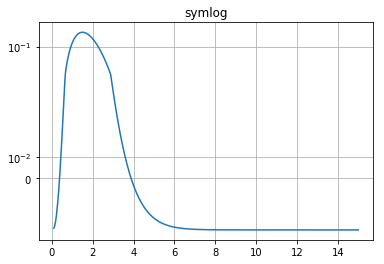

In [28]:
x = np.linspace(0.1, 15, 500)
# Creates an array of 500 floats between 0.1 and 15
y = x**3/np.exp(2*x)
# Equal to x cubed, divided by e^2x

plt.figure(1)
plt.plot(x,y)
plt.yscale("linear")
plt.title("linear")
plt.grid(True)

plt.figure(2)
plt.plot(x,y)
plt.yscale("log")
plt.title("log")
plt.grid(True)

plt.figure(3)
plt.plot(x,y)
plt.yscale("logit")
plt.title("logit")
plt.grid(True) 

plt.figure(4)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)


# Ticks and tickers 

The axes have little marks called "ticks".  
To be precise, 
- "ticks" are the `locations` of the markers (eg: (-1, 0,1)), 
- "tick lines" are the small lines drawn at those locations,
- "tick labels" are the labels drawn next to the tick lines, and
- "tickers" are the objects that are capable of deciding where to place ticks.   

The default tickers are typically do a pretty good job at placing ~5 to 8 ticks at a reasonable distance from one another. 

But, sometimes, you need more control ( eg: there are too many tick labels on the logit graph above. 

Fortunately, matpltlib gives you full control over ticks. 
You ccan even activate minor ticks. 


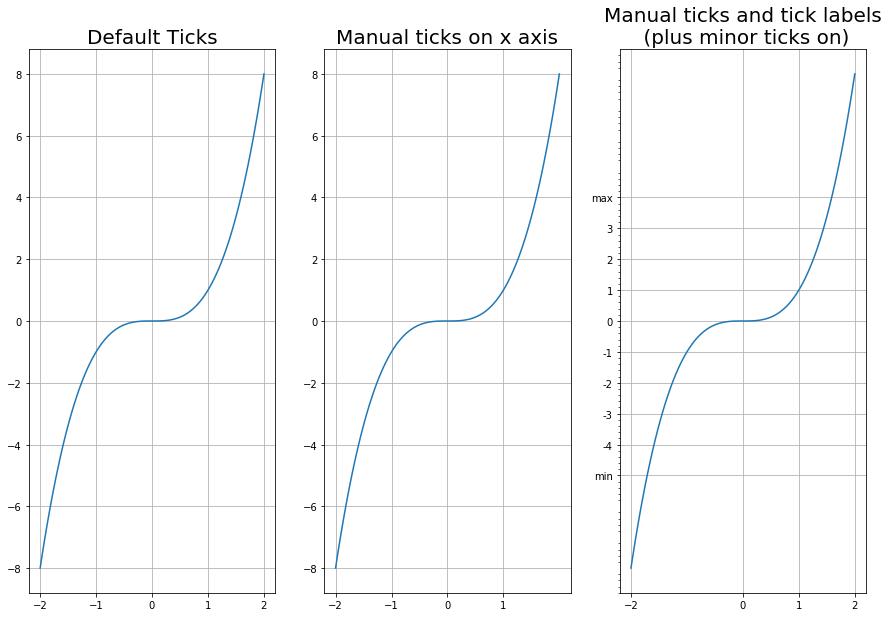

In [41]:
x = np.linspace(-2,2,100)

plt.figure(1, figsize = (15,10))
plt.subplot(131) # 1 Rows, 3 columns, 1st subplot
plt.plot(x , x**3)
plt.grid(True)
plt.title("Default Ticks", fontsize = 20)  

ax = plt.subplot(132) 
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2,2,1)) 
# Set's the ticks from array [-2,-1,0,1]
plt.grid(True)
plt.title("Manual ticks on x axis", fontsize = 20) 


ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
# >> Adds autoscaling minor ticks to the axes.  
ax.tick_params(axis = 'x', which = 'minor', bottom = 'off')
ax.xaxis.set_ticks([-2, 0,1,2])
ax.yaxis.set_ticks(np.arange(-5,5,1))
ax.yaxis.set_ticklabels(["min", -4,-3,-2,-1, 0,1,2,3, "max"])
plt.title("Manual ticks and tick labels\n (plus minor ticks on)", 
         fontsize = 20)
plt.grid(True)


# Polar Projection: 

Drawing a [polar graph](https://www.khanacademy.org/math/multivariable-calculus/integrating-multivariable-functions/double-integrals-a/v/polar-coordinates-1) is as easy as setting the `projection` attribute to `polar`when creating a subplot. 
[Polar Graph: Math is Fun](https://www.mathsisfun.com/polar-cartesian-coordinates.html)  

__Summary:__   
To convert from Polar Coordinates (x $\theta$) to Cartesian Coordinates: 

- $  x = r * cos\theta $
- $ y = r * sin\theta $   

To convert from Cartesian Coordinates (x,y) to Polar Coordinates $ (r, \theta ) $  

- $ r = \sqrt{x^2 + y^2} $
- $ \theta = tan^{-1}(\frac{y}{x}) $   

The value of $ tan{-1}( y/x )$ may need to be adjusted:

- Quadrant I: Use the calculator value
- Quadrant II: Add 180°
- Quadrant III: Add 180°
- Quadrant IV: Add 360°


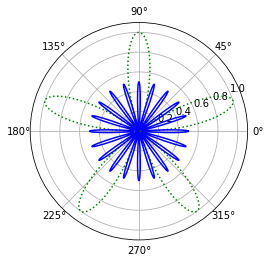

In [52]:
radius = 1
theta = np.linspace(0, 2*np.pi*radius, 1000)
# >> array of 1000 floats between 0 and 2πr
# ( circumference)

plt.subplot(111, projection = 'polar')
plt.plot(theta, np.sin(5*theta), "g:")
# np.sin(5*theta) creates the r value for a certain theta. 
# Beautiful top see how it's making a flower. 
plt.plot(theta, 0.5*np.cos(20*theta), "b-")


# 3D projection: 

Plotting #D graphs is quite straightforward.  
You need to import Axes3D object, which you can use to call `plot_surface`, giving x, y, z coordinates, plus optional attributes. 

In [70]:
nx, ny = (3,2)
x = np.linspace(0,1,nx)
# >> [ 0. ,  0.5,  1. ]
# >> Generates vector of 3 floats between 0 and 3. 
y = np.linspace(0,1,ny)
# >> [ 0.,  1.]
# >> Generates vector of 2 floats between 0 and 1. 

xv, yv = np.meshgrid(x,y)
xv
# array([[ 0. ,  0.5,  1. ],
#        [ 0. ,  0.5,  1. ]])

#yv
# >> array([[ 0.,  0.,  0.],
# >>       [ 1.,  1.,  1.]])

# Both xv and yv are 2x3 matrices. 

array([[ 0. ,  0.5,  1. ],
       [ 0. ,  0.5,  1. ]])

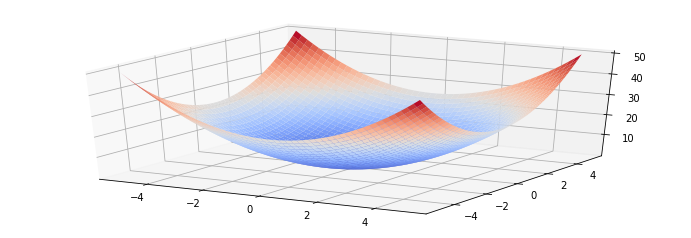

In [91]:
from mpl_toolkits.mplot3d import Axes3D  

x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)
X,Y = np.meshgrid(x,y)
# >> Generates coordinate matrices from 
# coordinate vectors 
# R = np.sqrt(X**2 + Y**2)
Z = X**2 + Y**2

figure = plt.figure(1, figsize = (12,4))
subplot3d = plt.subplot(111, projection = "3d")
# !st row, 1st column, 1st subplot
surface = subplot3d.plot_surface(X,Y,Z, rstride = 1,
                            cstride = 1, 
                            cmap = matplotlib.cm.coolwarm,
                            linewidth = 10) 

Another way to display this same data is `via` a contour plot. 


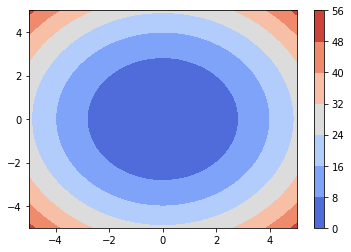

In [95]:
plt.contourf(X,Y,Z, cmap = matplotlib.cm.coolwarm)
plt.colorbar()
# The colorbar shows the Z values corresponding to a 
# color. 


# Scatter Plot

To draw a scatter plot, simply provide the x and y coordingates of the points. 

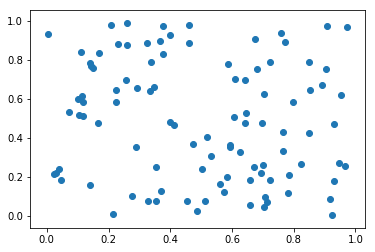

In [100]:
from numpy.random import rand
x, y = rand(2,100)
# Creates 2 arrays x and y filled with random numbers. 
# Each's order is (100, )
plt.scatter(x,y)

You may optionally provide the scale of each point: 

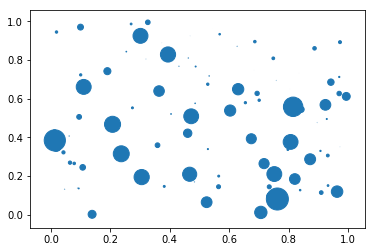

In [102]:
x,y, scale = rand(3,100)
# Creates 2 arrays x, y, scale filled with 
# random numbers. Each's order is (100, )

scale = 500*scale**5
plt.scatter(x,y, s=scale)
# >> The scale argument just decides the importance of 
# each (x,y) coordinate. 

As usual, there are a number of attributes you can set, such as the fill and edge colors, and the alpha level (transparency). 

In [ ]:
for color in ['red'